In [71]:
import torch
import numpy as np
from torchvision import models
from custom_classes import Save_Output


In [72]:
model_old = models.alexnet(pretrained=True)

In [73]:
model_old.classifier[1] = nn.Linear(9216,4096)
model_old.classifier[4] = nn.Linear(4096,1024)
model_old.classifier[6] = nn.Linear(1024,10)

In [74]:
model_old.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [77]:
import copy
model_new = copy.deepcopy(model_old)
layers = []
temp = model_old.children()
features = 0
for i in temp:
    features = i
    break
for layer, child in enumerate(features):
    filename = "layer_" + str(layer) + ".csv"
    features  = torch.nn.Sequential(
        features,
        Save_Output(filename),
        child
    )
    print(child)
    layers.append(str(child))

Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
ReLU(inplace=True)
MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
ReLU(inplace=True)
MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True)
Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True)
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True)
MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)


In [81]:
features.eval()

Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Sequential(
        (0): Sequential(
          (0): Sequential(
            (0): Sequential(
              (0): Sequential(
                (0): Sequential(
                  (0): Sequential(
                    (0): Sequential(
                      (0): Sequential(
                        (0): Sequential(
                          (0): Sequential(
                            (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
                            (1): ReLU(inplace=True)
                            (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
                            (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
                            (4): ReLU(inplace=True)
                            (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
                            (6): Conv2d(192, 384, kernel_size=(3,

In [79]:
model_new.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [62]:
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torchvision

In [63]:
IMAGE_SIZE = 64
#Generates an object to store multiple transformations

composed = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


In [64]:
#Creating the two dataset objects and applying our transformations from above

# dataset_train = dsets.FashionMNIST(root= '.fashion/data', train=True, transform=composed,  download=True)
  
# dataset_val = dsets.FashionMNIST(root= '.fashion/data', train=False, transform=composed,  download=True)

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=composed)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=composed)
testloader = torch.utils.data.DataLoader(testset, batch_size=100,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [65]:
# #Data Loader for training data
# train_loader = torch.utils.data.DataLoader(dataset=dataset_train, batch_size=100 )

# #Data Loader for validation data
# test_loader = torch.utils.data.DataLoader(dataset=dataset_val, batch_size=100 )

In [66]:
# model = model_old
# correct=0
# N_test=len(testset)

# #Put model into validation mode (turns off Dropout if there are Dropout layers)
# model.eval()
# for x_test, y_test in testloader:
#     #Make a prediction
#     z = model(x_test)
#     #Grab the index of the AI's highest probability guess (Each output of model(x) is a tensor of probabilities) 
#     y_hat = torch.argmax(z, 1)
#     #Update correct counter if the prediction was correct
#     correct += (y_hat == y_test).sum().item()
# accuracy = correct / N_test
# print("Validation accuracy: " + str(accuracy))

Validation accuracy: 0.1137


In [69]:
model = model_new
correct=0
N_test=len(testset)

#Put model into validation mode (turns off Dropout if there are Dropout layers)
model.eval()
for x_test, y_test in testloader:
    #Make a prediction
    z = model(x_test)
    #Grab the index of the AI's highest probability guess (Each output of model(x) is a tensor of probabilities) 
    y_hat = torch.argmax(z, 1)
    #Update correct counter if the prediction was correct
    correct += (y_hat == y_test).sum().item()
accuracy = correct / N_test
print("Validation accuracy: " + str(accuracy))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (153600x6 and 9216x4096)

In [ ]:
files = []
for i in range(len(layers)):
    filename = "layer_" + str(i) +".csv"
    files.append(open(filename, 'r'))

data = []
for file in files:
    data.append( [float(s) for s in file.readline().split(sep=',') if '.' in s])


In [ ]:
import pandas as pd
# my_data = {}
# for index, values in enumerate(data):
#     name = "layer " + str(index)
#     my_data[name] = np.array(values).mean()

new_data = [np.array(i).mean() for i in data]

df = pd.DataFrame(new_data)

<AxesSubplot:>

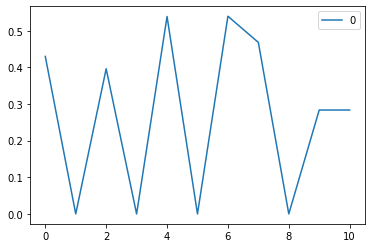

In [ ]:
df.plot()

In [ ]:
import os
for file in files:
    file.close()
    os.remove(file.name)

In [ ]:
df = pd.DataFrame(new_data, index=layers)

In [ ]:
df

,0
"Conv2d(1, 5, kernel_size=(3, 3), stride=(1, 1))",0.429789
ReLU(),0.000000
"Conv2d(5, 10, kernel_size=(3, 3), stride=(1, 1))",0.396135
ReLU(),0.000000
"Conv2d(10, 5, kernel_size=(3, 3), stride=(1, 1))",0.538690
ReLU(),0.000000
"MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)",0.539453
"Conv2d(5, 1, kernel_size=(3, 3), stride=(1, 1))",0.468058
ReLU(),0.000000
"Flatten(start_dim=1, end_dim=-1)",0.283542


In [ ]:
print(len(layers))

11
